# Economy Analysis post COVID-19

## Introduction  
This project conducts exploratory data analysis to examine the shifts in the global economy following the COVID-19 pandemic. The dataset, sourced from Kaggle, provides a thorough examination of economic trends across nine key economies from the onset of the pandemic until early 2024. It includes essential economic indicators and financial market information, encompassing manufacturing and service sector performance, consumer sentiment, monetary policies, inflation rates, unemployment rates, and overall economic output. [Here](https://www.kaggle.com/datasets/keneticenergy/economic-data-life-after-covid) is the link to access the dataset.

##  Data cleaning and Data processing

##### **Importing the required libraries**```

In [1]:
# importing the python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import warnings

%matplotlib inline

##### **Importing the dataset**

In [2]:
#creating the data frame
covid_df=pd.read_csv('/kaggle/input/economic-data-covid19/economic data_1.xls')

In [3]:
covid_df.head()

,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
0,australia,2020-01-01,49.6,50.6,93.4,0.75,2.2,1.7,5.2,1.2,audusd,0.7021,0.7031,0.6682,0.6691
1,australia,2020-02-01,50.2,49.0,95.5,0.75,2.2,1.7,5.1,1.2,audusd,0.6690,0.6776,0.6434,0.6509
2,australia,2020-03-01,49.7,38.5,91.9,0.50,2.2,1.7,5.2,1.2,audusd,0.6488,0.6686,0.5507,0.6135
3,australia,2020-04-01,44.1,19.5,75.6,0.25,-0.3,1.2,6.3,-6.1,audusd,0.6133,0.6571,0.5979,0.6510
4,australia,2020-05-01,44.0,26.9,88.1,0.25,-0.3,1.2,7.0,-6.1,audusd,0.6511,0.6684,0.6371,0.6666


**Performing the basic data cleaning task like checking for blank spaces and duplicates.  
Checking the format of the data and performing required changes.**

In [4]:
#checking duplicate
covid_df[covid_df.duplicated()]

,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close


In [5]:
# find of number of unique countries
covid_df['country'].unique()

array(['australia', 'canada', 'china', 'europe', 'japan', 'new zealand',
       'switzerland', 'united kingdom', 'united states'], dtype=object)

In [6]:
#checking format
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              432 non-null    object 
 1   date                 432 non-null    object 
 2   manufacturing pmi    432 non-null    float64
 3   services pmi         432 non-null    float64
 4   consumer confidence  432 non-null    float64
 5   interest rates       432 non-null    float64
 6   cpi yoy              432 non-null    float64
 7   core cpi             432 non-null    float64
 8   unemployment rate    432 non-null    float64
 9   gdp yoy              432 non-null    float64
 10  ticker               432 non-null    object 
 11  open                 432 non-null    float64
 12  high                 432 non-null    float64
 13  low                  432 non-null    float64
 14  close                432 non-null    float64
dtypes: float64(12), object(3)
memory usage: 

In [7]:
#changing the date formate to DateTime
covid_df['date']=pd.to_datetime(covid_df.date)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   country              432 non-null    object        
 1   date                 432 non-null    datetime64[ns]
 2   manufacturing pmi    432 non-null    float64       
 3   services pmi         432 non-null    float64       
 4   consumer confidence  432 non-null    float64       
 5   interest rates       432 non-null    float64       
 6   cpi yoy              432 non-null    float64       
 7   core cpi             432 non-null    float64       
 8   unemployment rate    432 non-null    float64       
 9   gdp yoy              432 non-null    float64       
 10  ticker               432 non-null    object        
 11  open                 432 non-null    float64       
 12  high                 432 non-null    float64       
 13  low                  432 non-null  

In [8]:
#data summary
covid_df.describe()

,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,open,high,low,close
count,432,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,2021-12-15 23:00:00,51.878935,51.111968,42.679051,1.495486,3.328241,2.788657,4.764352,1.894444,25.934223,26.467713,25.493275,26.020603
min,2020-01-01 00:00:00,26.000000,12.000000,-52.500000,-0.750000,-1.300000,-1.000000,1.900000,-21.900000,0.559300,0.587400,0.547000,0.559400
25%,2020-12-24 06:00:00,48.275000,48.600000,-10.525000,0.000000,0.900000,1.075000,3.400000,0.200000,0.910300,0.921625,0.891900,0.908800
50%,2021-12-16 12:00:00,51.100000,51.850000,49.290000,0.250000,2.900000,2.100000,4.200000,1.700000,1.257650,1.281150,1.230350,1.257150
75%,2022-12-08 18:00:00,55.925000,55.200000,86.850000,3.650000,5.400000,4.800000,5.700000,4.500000,7.063525,7.131225,6.979650,7.082575
max,2023-12-01 00:00:00,70.000000,67.600000,127.000000,5.500000,11.100000,7.400000,14.900000,25.700000,151.710000,151.960000,147.380000,151.670000
std,NaN,6.121829,7.205442,51.862085,1.926930,2.899658,2.220279,2.003634,5.562154,45.859841,46.860450,45.028341,46.039390


#### **Primary observations based on the summary**

With an average manufacturing and service PMI **exceeding 50**, it's evident that expansion has been occurring in both the manufacturing and service sectors throughout the four-year period.

A score of more than 50 indicates an expansion of the manufacturing sector, a score of less than 50 indicates a decline, and a score of 50 indicates no change from the previous month.

The average consumer confidence index is around 42, which means consumers are moderately pessimistic.A low Consumer Confidence Index number tends to suggest that consumers are feeling less hopeful and more wary about the state of the economy

* **'>100'** indicates that consumers are more optimistic versus the benchmark
* **='100'** indicates that consumers are neutral versus the benchmark.
* **<'100'** indicates that consumers are more pessimistic versus the benchmark.

The average CIP y-o-y is 3% and the average core cpi is 2%

In [9]:
#creating country wise dataframes for further analysis
australia_df=covid_df[covid_df.country=='australia']
canada_df=covid_df[covid_df.country=='canada']
china_df=covid_df[covid_df.country=='china']
europe_df=covid_df[covid_df.country=='europe']
japan_df=covid_df[covid_df.country=='japan']
new_zealand_df=covid_df[covid_df.country=='new zealand']
switzerland_df=covid_df[covid_df.country=='switzerland']
united_kingdom_df=covid_df[covid_df.country=='united kingdom']
united_states_df=covid_df[covid_df.country=='united states']

## Data Analysis and Data Visualization

#### **Finding the relation between PMI's over the time across all countries**

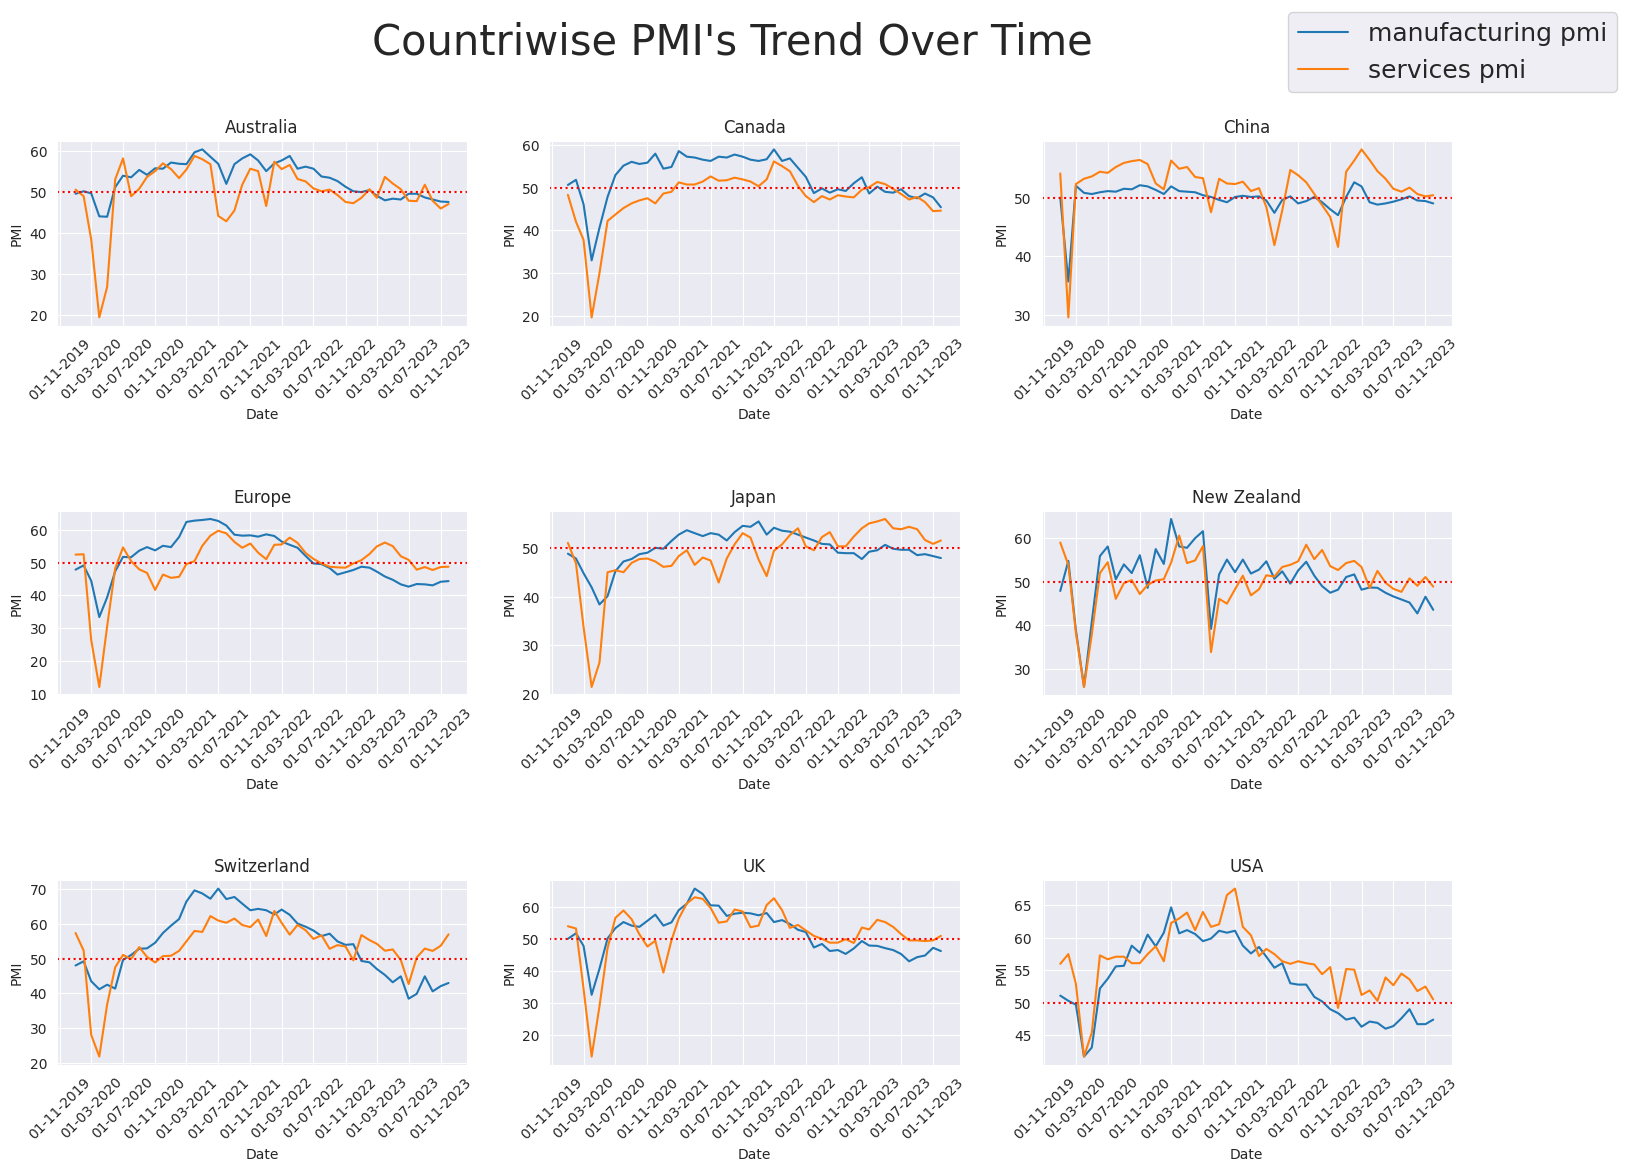

<Figure size 640x480 with 0 Axes>

In [10]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
plt.figure();

# Plotting data
axes[0, 0].plot(australia_df['date'], australia_df['manufacturing pmi'])
axes[0, 0].plot(australia_df['date'], australia_df['services pmi'])
axes[0, 0].set_title('Australia')

axes[0, 1].plot(canada_df['date'], canada_df['manufacturing pmi'])
axes[0, 1].plot(canada_df['date'], canada_df['services pmi'])
axes[0, 1].set_title('Canada')

axes[0, 2].plot(china_df['date'], china_df['manufacturing pmi'])
axes[0, 2].plot(china_df['date'], china_df['services pmi'])
axes[0, 2].set_title('China')

axes[1, 0].plot(europe_df['date'], europe_df['manufacturing pmi'])
axes[1, 0].plot(europe_df['date'], europe_df['services pmi'])
axes[1, 0].set_title('Europe')

axes[1, 1].plot(japan_df['date'], japan_df['manufacturing pmi'])
axes[1, 1].plot(japan_df['date'], japan_df['services pmi'])
axes[1, 1].set_title('Japan')

axes[1, 2].plot(new_zealand_df['date'], new_zealand_df['manufacturing pmi'])
axes[1, 2].plot(new_zealand_df['date'], new_zealand_df['services pmi'])
axes[1, 2].set_title('New Zealand')

axes[2, 0].plot(switzerland_df['date'], switzerland_df['manufacturing pmi'])
axes[2, 0].plot(switzerland_df['date'], switzerland_df['services pmi'])
axes[2, 0].set_title('Switzerland')

axes[2, 1].plot(united_kingdom_df['date'], united_kingdom_df['manufacturing pmi'])
axes[2, 1].plot(united_kingdom_df['date'], united_kingdom_df['services pmi'])
axes[2, 1].set_title('UK')

axes[2, 2].plot(united_states_df['date'], united_states_df['manufacturing pmi'])
axes[2, 2].plot(united_states_df['date'], united_states_df['services pmi'])
axes[2, 2].set_title('USA')

# Customizing the x-axis date format and locator
ax1 = [(axes[0, 0]),(axes[0, 1]),(axes[0, 2]),(axes[1, 0]),(axes[1, 1]),(axes[1, 2]),(axes[2, 0]),(axes[2, 1]),(axes[2, 2])]
for ax in ax1:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    
# Rotate x-axis dates
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Adding a threshold line and labels
    threshold = 50
    ax.axhline(threshold, color='red', ls='dotted')
    ax.set_xlabel('Date')
    ax.set_ylabel('PMI')
fig.subplots_adjust(hspace=1)
labels = ['manufacturing pmi', 'services pmi']
fig.legend(labels=labels, loc="upper right", fontsize=18)
fig.suptitle('Countriwise PMI\'s Trend Over Time', fontsize=30)
plt.tight_layout(pad=2)  # Adjust layout to prevent clipping of tick-labels



* As depicted in the graphs, **the manufacturing PMI and Service PMI exhibit a nearly synchronous pattern, closely following similar trends over time.**    
* From March 2020 to the end of 2022, the manufacturing PMI remains above 50 in the majority of countries, peaking in the first quarter of 2021. This suggests significant economic expansion within the manufacturing sector during that period.
* It appears that the service industry has been more significantly affected by COVID-19, as evidenced by the greater fluctuation observed in the service PMI.  
* The lowest readings for both PMIs were observed at the beginning of March 2020, coinciding with the onset of the COVID-19 pandemic. During this period, the Service PMI was particularly adversely affected compared to the Manufacturing PMI.  
* China exhibits continuous fluctuations in both PMIs, which could be attributed to the country experiencing multiple waves of COVID-19.  


In [11]:
# grouping the data by date 
datewise_global_df =covid_df.groupby('date')[['manufacturing pmi', 'services pmi', 'consumer confidence','unemployment rate','core cpi', 'interest rates']].mean()

In [12]:
datewise_global_df.head()

,manufacturing pmi,services pmi,consumer confidence,unemployment rate,core cpi,interest rates
date,,,,,,
2020-01-01,49.322222,53.632222,54.377778,4.477778,1.500000,1.033333
2020-02-01,48.966667,48.542222,54.452222,4.566667,1.455556,1.033333
2020-03-01,46.333333,38.071111,51.247778,4.911111,1.333333,0.827778
2020-04-01,38.300000,25.426667,35.600000,6.855556,0.966667,0.533333
2020-05-01,42.244444,35.191111,38.038889,6.877778,0.855556,0.455556


#### **Relationship between manufacturing pmi and services pmi on the global scale**

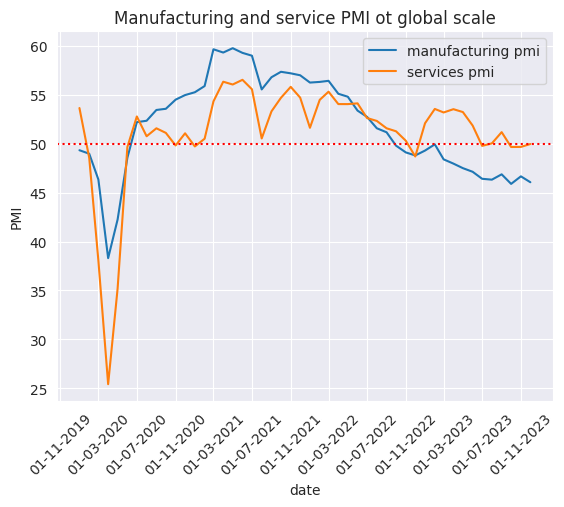

In [13]:
plt.plot(datewise_global_df.index , datewise_global_df['manufacturing pmi'])
plt.plot(datewise_global_df.index , datewise_global_df['services pmi'])
threshold=50
plt.axhline(threshold, color='red', ls='dotted')
plt.xlabel('date')
plt.ylabel('PMI')
plt.legend(['manufacturing pmi', 'services pmi'])
plt.title('Manufacturing and service PMI ot global scale')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xticks(rotation=45);

* The same pattern is evident, mirroring what we've observed in the country-wise PMI trends: **manufacturing PMI and Service PMI closely align and follow similar trends over time.**  
* Both PMIs remain above 50 from March 2020 to March 2023, signaling economic expansion in the global economy during that period.

#### **Exploaring the trends for Consumer confidence Indicator**

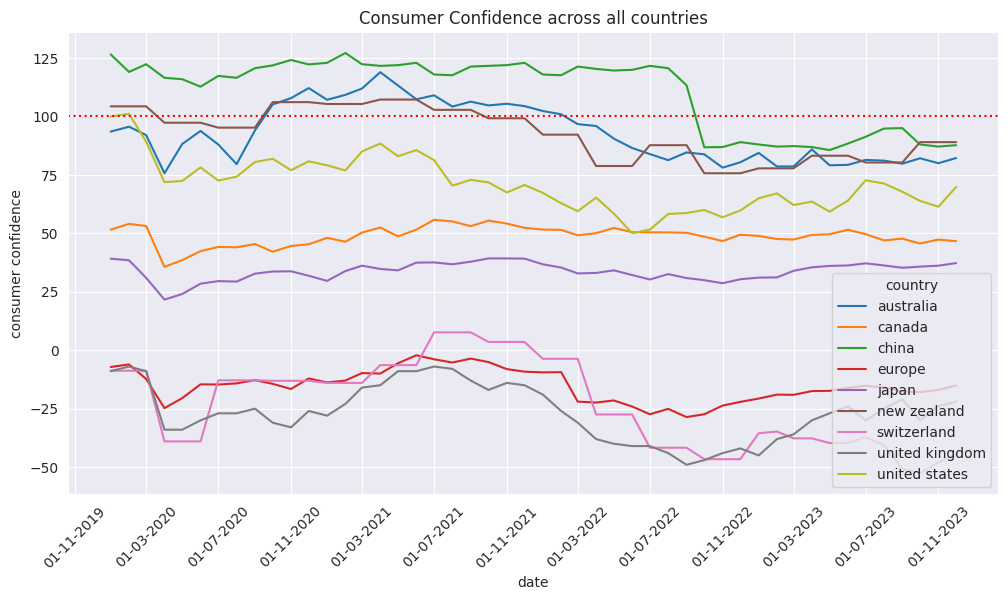

In [14]:
# plotting the consumer confidence for all countries
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize = (12,6))
threshold=100
fig = sns.lineplot(x = "date", y = "consumer confidence",hue='country', data = covid_df, ax=ax)
ax.axhline(threshold, color='red', ls='dotted')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_title('Consumer Confidence across all countries')
covid_df['date']=pd.to_datetime(covid_df.date)
ax.tick_params(axis='x', rotation=45)
#x_dates = covid_df['date'].dt.strftime('%Y-%m-%d')
#ax.set_xticklabels(labels=x_dates, rotation=45, ha='right');

* From the end of 2020 to the middle of 2022, China, Australia, and New Zealand stand out as the only countries where the CCI surpasses 100, suggesting a higher level of consumer optimism in these nations.
* For the UK, Switzerland, and Europe, the CCI falls within the negative range, indicating a high level of consumer pessimism regarding the economy.



#### **Exploaring the trends for GDP Y-O-Y Indicator**

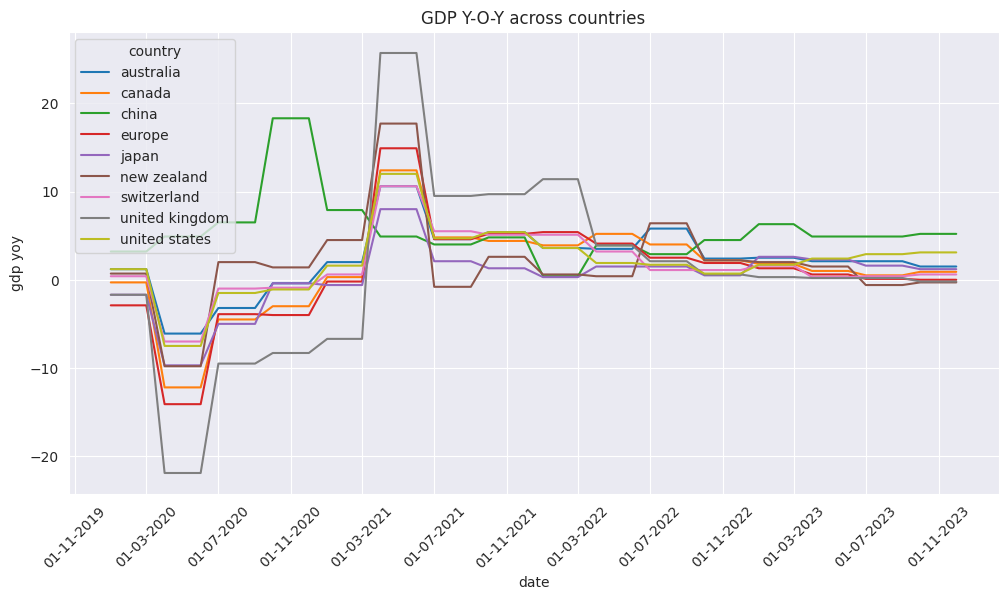

In [15]:
import seaborn as sns
import warnings
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.lineplot(x = "date", y = "gdp yoy",hue='country', data = covid_df, ax=ax)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_title('GDP Y-O-Y across countries')
#covid_df['date']=pd.to_datetime(covid_df.date)
ax.tick_params(axis='x', rotation=45)

* From March to July 2020, GDP appears to hit its lowest point across all countries, coinciding with the onset of the COVID-19 first wave that affected all nations during that period.
* GDP appears to peak from March 2021 to July 2021, marking the period when the first COVID-19 waves subsided and the economy began to expand.

#### **Relation between average Unemplyement rate, Interest rates amd Core CPI at global scale**

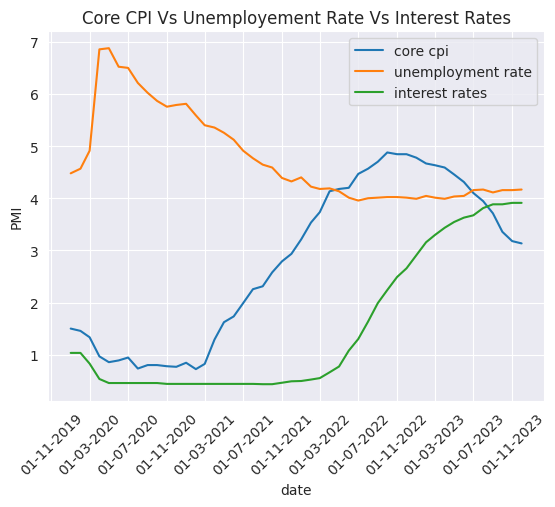

In [16]:
plt.plot(datewise_global_df.index , datewise_global_df['core cpi'])
plt.plot(datewise_global_df.index , datewise_global_df['unemployment rate'])
plt.plot(datewise_global_df.index , datewise_global_df['interest rates'])
plt.xlabel('date')
plt.ylabel('PMI')
plt.legend(['core cpi', 'unemployment rate', 'interest rates'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.title('Core CPI Vs Unemployement Rate Vs Interest Rates')
plt.xticks(rotation=45);

* The **unemployment rate appears to have an inverse relationship with both the core CPI (Consumer Price Index) and interest rates**. This correlation aligns logically, as in response to the COVID-19 pandemic, the Federal Reserve implemented unprecedented supervisory and regulatory measures to bolster economic activity.
* Once the unemployment rate began to decline, both the CPI and interest rates started to increase.


## Conclusion

* At the onset of **March 2020, all financial indicators hit their lowest points**, with the unemployment rate peaking, marking the beginning of the global COVID-19 pandemic's first wave.
* Governments kept interest rates and CPI low to address inflation and unemployment during the initial stages of the pandemic. Interest rates initially decreased alongside unemployment rates but began to rise as unemployment decreased.
* **The manufacturing and service sector PMIs consistently displayed positive trends**, maintaining levels above 50 for the majority of the time, indicating ongoing economic expansion.
* Both PMIs reached their peak during the second quarter of 2021, coinciding with the highest GDP growth during that period. This surge occurred as the first wave of COVID-19 ended in most countries.
* **Consumer confidence suggests a prevailing pessimistic sentiment** toward the economy during and after the pandemic.
* Broadly, **this exploratory data analysis indicates a gradual and steady post-pandemic economic growth. Unemployment is declining, and consumer purchasing power is increasing over time**. However, consumer attitudes appear to be moderately pessimistic.